In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ising_animator import IsingAnimator
from abstract_ising import AbstractIsing

%matplotlib inline

In [2]:
class RandomBondIsing1DPBC(AbstractIsing):
    def __init__(self, N, J=1.):
        self.J, self.N = J, N
        self.num_spins = self.N
        
        self.bonds = 2*(np.random.rand(self.N) < 0.5) - 1
        
        # initialize system at infinite temperature
        # i.e. spins are completely random and uncorrelated
        self.spins = 2*(np.random.rand(self.N) < 0.5) - 1
    
    def energy(self, spins=None):
        """Returns the energy of the current spin configuration"""
        spins = self.spins if spins is None else spins
        interactions = self.bonds * spins * np.roll(spins, 1, axis=-1)
        total = self.J * np.sum(interactions, axis=-1)
        return total

    def energy_diff(self, i):
        """Returns the energy difference resulting from flipping the i'th site"""
        # sum the nearest neighbour sites
        
        nn_sum = (
            self.bonds[i] * self.spins[i-1] 
            + self.bonds[(i+1)%self.N] * self.spins[(i+1) % self.N] 
        )

        return -2 * self.J * self.spins[i] * nn_sum
    
    def rand_site(self):
        """Selects a site in the lattice at random"""
        return (np.random.randint(self.N),)

In [43]:
np.random.seed(4)
#10 variables J=1 Random Bijs
ising = RandomBondIsing1DPBC(4, J=1)
#ising.spins
ising.spins = [-1,-1,1,-1]

e1 = ising.energy()
print(e1)

diff = ising.energy_diff(2)
ising.spins = [-1,-1,-1,-1]
e2 = ising.energy()
print(e2)

0
-4


In [44]:
print(diff)
print(e2-e1)

-4
-4


In [23]:
N = 1000
t = np.arange(N)
T_i = 100
T_f = 0.01

T = T_i * ((T_f/T_i) ** (t/N))
len(t)

1000

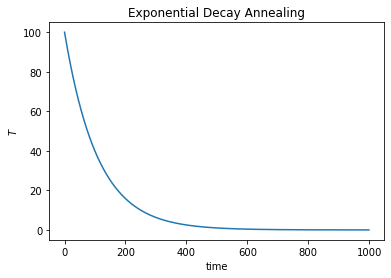

In [22]:
plt.plot(t, T)
plt.title("Exponential Decay Annealing")
plt.ylabel("$T$")
plt.xlabel("time");

0.010000000000005116

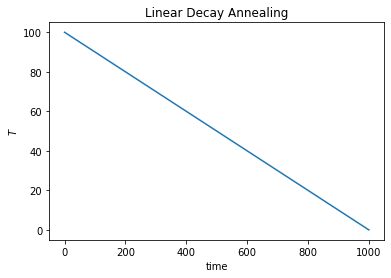

In [31]:
N = 1000
t = np.arange(N+1)
T_i = 100
T_f = 0.01

T =  T_i - (T_i - T_f)*(t/N)#(T_i-T_f)*(t/N)#* ((T_f/T_i) ** (t/N))

plt.plot(t, T)
plt.title("Linear Decay Annealing")
plt.ylabel("$T$")
plt.xlabel("time");
T[0]
T[len(T)-1]

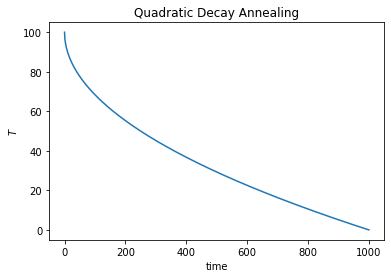

In [17]:
N = 1000
t = np.arange(N+1)
T_i = 100
T_f = 0.01

T = T_i - (T_i-T_f)*((t/N)**(1/2))

plt.plot(t, T)
plt.title("Quadratic Decay Annealing")
plt.ylabel("$T$")
plt.xlabel("time");

In [9]:
T

array([1.0000000e+02, 9.9999900e+01, 9.9999600e+01, ..., 4.0956004e-01,
       2.0988001e-01, 1.0000000e-02])